<center> <h1> Machine Learning for Large-Scale Data Analysis and Decision Making  (ML 60-629A) </h1> </center>

<center> <h2> WINTER 2024  </h2> </center>

<center> <h1> Assignment  </h1> </center>

---

### Read-only version of this notebook is available at: https://github.com/JuanJavierr/ml1-homework/blob/main/xavier-peladeau-asselin-HW.ipynb

# 1. Machine Learning Principles (20pt)

### 1.1 (4pt) Explain the difference between the training error and the generalization error. Make sure to describe how to evaluate the generalization error of a model in practice including pitfalls of this approach.


The training error is the average error made by the model over all samples over which it was trained. In the absence of regularization, a model's parameters are set in order to minimize the training error. By contrast, the generalization error is the expected value of the model's error on a new, previously unseen input.

In practice, the generalization error is most often evaluated by dividing the total dataset available for training into a training and a testing subset. The model will be trained using the training subset, and its performance will then be evaluated by computing the average error over all entries in the testing subset. One important pitfall of this approach is that it reduces the total amount of data which can be used to train the model, since a portion of it has to be kept for testing. This pitfall can be attenuated by using k-fold cross-validation.

### 1.2 (4pt) To increase the size of your training set you first train a model and then use it to obtain labels on an unlabelled test set. You then retrain the model with the data from your train set as well as the data from your test set. Would you expect that your final model would obtain a lower validation error ?

No, I would not expect the model to obtain a lower validation error. The advantage of using a larger training set is that it gives a model more examples to learn from when searching for patterns in the data during training. The data labelled by the first model will contain some errors. If these errors are included in the second model's training set, the second model will learn from the erroneous patterns produced by the first model. Therefore, the second model would perform either as well or worse than the first.

### 1.3 (4pt) Suggest a method for regularization of a K-NN model. Hint : think of what regularization accomplishes in terms of the bias/variance trade off.

The main point of regularization is to prevent overfitting. Overfitting is unwanted because it leads to high variance in the model's predictions. A way to prevent high variance in a K-NN model would be to use higher values of K. Since the value of K determines the number of neighboring points that are used to determine the prediction, a higher value would imply that predictions are less sensitive to variations in individual entries in the training data.

### 1.4 (4pt) Recall the task of document classification where documents must be classified based on their content. If the documents are encoded in a bag-of-words format, could you use K-NN to classify them? If so, describe a reasonable distance function to use. Otherwise, explain why not.

Yes, it is reasonable to use a K-NN classifier in the context of a document classification task. A common factor in selecting a distance function for K-NN involves the number of dimensions in the dataset. Since the bag-of-words format implies a high-dimensionality, it would be unreasonable to use the "standard" euclidean distance, as it is unfit for high dimensionality. In this context, a more reasonable distance functions would be the Manhattan distance, which is the sum of the absolute differences between the coordinates of two points.

### 1.5 (4pt) Describe both the advantages and the disadvantages of using a larger K when doing K-fold cross validation.

Using a larger value for K when doing K-fold cross validation allows for a more reliable estimate of a model's performance. This is because the average error is computed over a larger number of predictions, and. Additionally, average error is computed over multiple combinations of training and testing data. A major disadvantage of using a larger K is that for each K, the model needs to be retrained, which can resource-intensive to compute.

# 2. Regression (30pt)

#### In this problem, we will use the this dataset: [California housing dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html) available in sklearn.
    
#### The dataset comes from the [StatLib repository](https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html). The task is to predict the median house price in different California districts (expressed in hundreds of thousands of dollars \$100,000).


In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, Lasso, Ridge
from sklearn.model_selection import cross_val_score, cross_validate, KFold, train_test_split
from sklearn import metrics
from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

random_state = 20160202

# feel free to add any library that you need to complete your tasks
from sklearn.preprocessing import StandardScaler

  #### You can load the data as a dataframe and use .describe() attribute to have a description of the dataset.

In [2]:
data, target = fetch_california_housing(return_X_y = True, as_frame = True)

### 2.1 Simple Linear Regression and Data Analysis (10pt)

### 2.1.1 What do you notice about the attribute values? (2pt)

In [3]:
data.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


The dataset consists of 20640 instances and 8 attributes.
The attributes are :
- MedInc - median income in block group
- HouseAge - median house age in block group
- AveRooms - average number of rooms per household
- AveBedrms - average number of bedrooms per household
- Population - block group population
- AveOccup - average number of household members
- Latitude - block group latitude
- Longitude -  block group longitude


Each instance represents a California census block group.
Some noticeable characteristics about the attribute values include :
- Some entries have very high values for AveRooms and AveBedrms, this anomaly is explained in the dataset description :
   * A household is a group of people residing within a home. Since the average number of rooms and bedrooms in this dataset are provided per household, these columns may take surprisingly large values for block groups with few households and many empty houses, such as vacation resorts.*
- While the dataset description indicates that "a block group typically has a population of 600 to 3,000 people", some entries seem to be outliers in this regard as the Population variable has a very high standard deviation, a low minimal value (3) and a high maximal value (35682).
- The AveOccup variable, while being mostly centered around values under 5, can take on extreme values with a max of 1243.33.
- Latitude and Longitude variables will probably not have a linear relationship with the target variable. While probably useful, they should ideally be transformed before being used as inputs to a model.

### 2.1.2 Look at the distribution of the attribute values by plotting their histograms. What do you notice? (3pt)

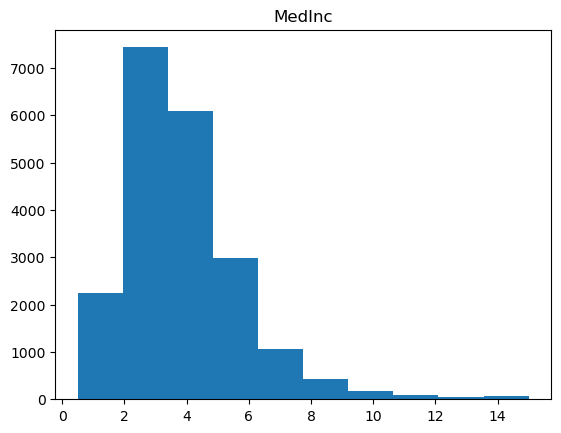

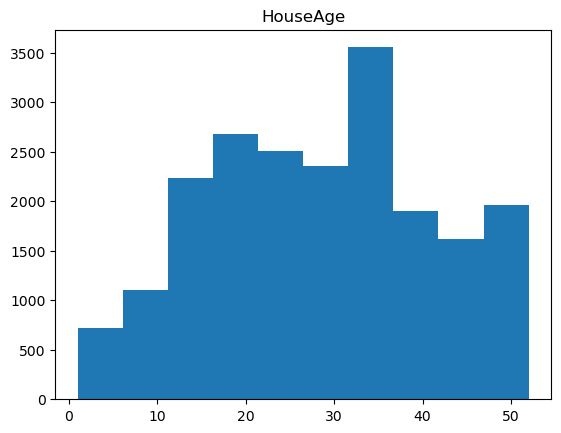

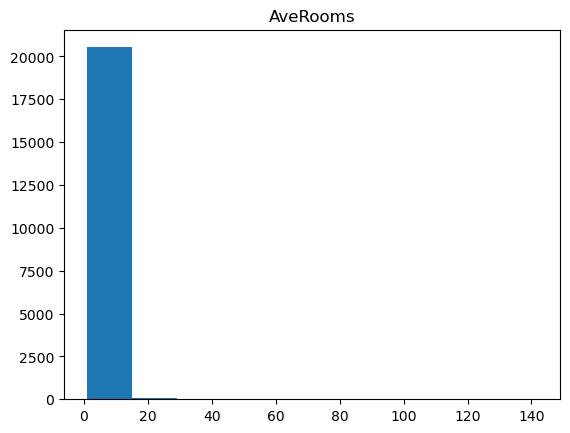

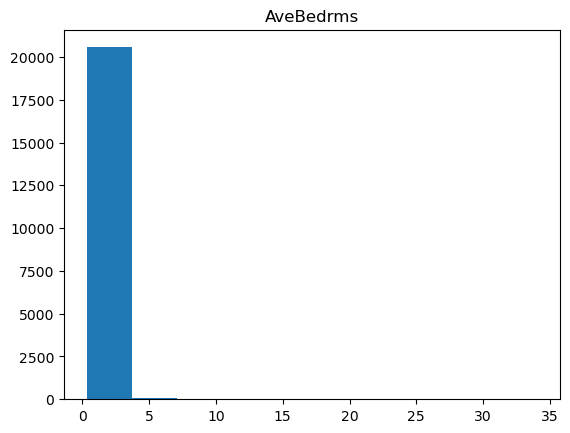

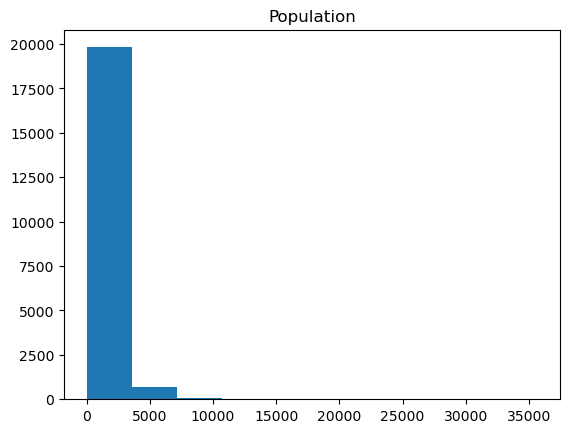

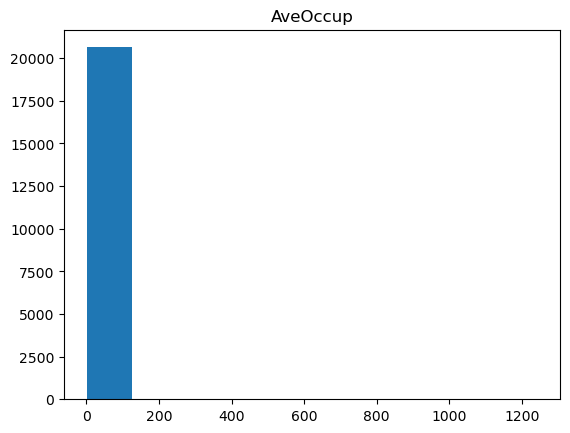

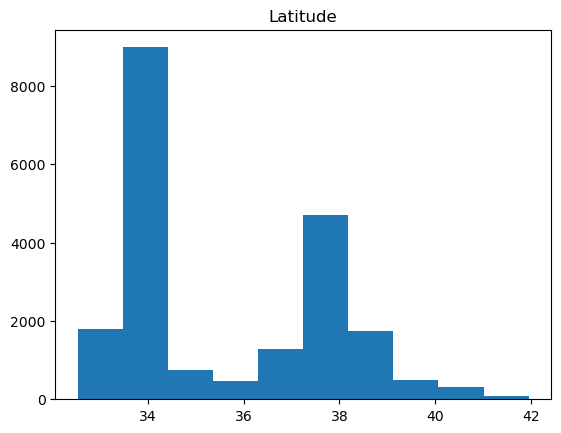

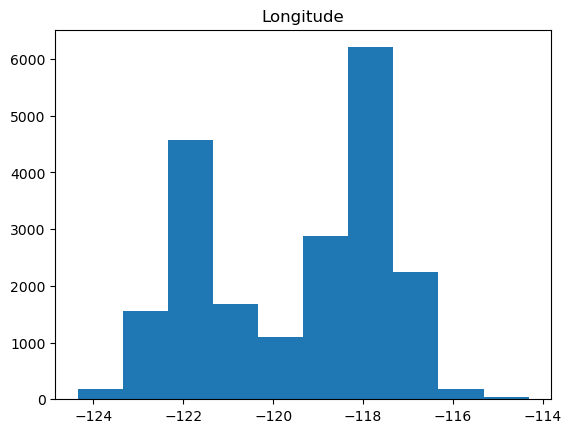

In [4]:
for col in data.columns:
    plt.hist(data[col])
    plt.title(col)
    plt.show()

The AveRooms, Population, AveBedrms and AveOccup variables are very imbalanced. They take extremely high outlier values in a small number of entries. Otherwise, their values are overwelmingly concentrated towards the lower end of their respective value ranges. 

Distributions of the other variables are mostly balanced.

The scale of values differs greatly between variables. For example, Longitude varies between values of -124 and -114, whereas Population ranges from near 0 to 35000.

### 2.1.3 Train a linear regression model (in sklearn "LinearRegression") with 10-fold cross validation. If necessary, there are multiple correct methods of doing it, you can use the option "random_state=20160202". What is the average mean square error (MSE) on the validation sets? (5pt)

In [5]:
# I have chosen to scale features in order to help with interpretation of weights
scaler = StandardScaler().set_output(transform="pandas")
data = scaler.fit_transform(data)

In [40]:
def train_model(model):
    validation_errors = []

    kf = KFold(n_splits=10)
    for train_i, validation_i in kf.split(data, target):
        train_X = data.loc[train_i]
        validation_X = data.loc[validation_i]
        train_y = target[train_i]
        validation_y = target[validation_i]

        # Train the model using the training sets
        model.fit(train_X, train_y)

        train_pred = model.predict(train_X)
        validation_pred = model.predict(validation_X)
        
        mse = metrics.mean_squared_error(validation_y, validation_pred)

        validation_errors.append(mse)

    return model, np.mean(validation_errors)

linear_regression, linear_regression_avg_mse = train_model(LinearRegression())
linear_regression_avg_mse

0.5509524296956597

The average mean squared error on the validation sets for the LinearRegression model is around 0.55.

  ### 2.2 Two very popular options in Linear Regression are the [Lasso method](https://en.wikipedia.org/wiki/Lasso_(statistics)) and the [Ridge Regression](https://en.wikipedia.org/wiki/Tikhonov_regularization). These models are implemented in sklearn: [Lasso](http://scikitlearn.org/stable/modules/generated/sklearn.linear_model.Lasso.html#sklearn.linear_model.Lasso) and [Ridge](http://scikitlearn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge). (20pt)

#### Hint: If you would like to better understand Lasso, have a look [here](http://scikit-learn.org/stable/auto_examples/linear_model/plot_ols_ridge_variance.html).

### 2.2.1 In one or two words describe what Lasso and Ridge capture? (2pt)

- Ridge regression, also known as L2 regularization, mainly aims to reduce overfitting by penalizing high individual coefficients.
- Lasso regression, also known as L1 regularization, mainly aims to reduce the number of features by limiting the total absolute value of coefficients.

### 2.2.2 Train a Lasso model and a Ridge model using 10-fold cross validation. Compare the weights of the attributes (features) between Lasso, Ridge, and the linear regression model. What do you notice? (13pt)

In [7]:
# Use cross-validation estimator to find best value for alpha
lasso = LassoCV(cv=10).fit(data, target)
lasso_best_alpha = lasso.alpha_

f"Lasso: Best value for alpha is {lasso_best_alpha}"

'Lasso: Best value for alpha is 0.0007939893889648998'

In [8]:
lasso, lasso_avg_mse = train_model(Lasso(alpha=lasso_best_alpha))
f"Lasso average MSE on validation sets: {lasso_avg_mse}"

'Lasso average MSE on validation sets: 0.5509547274235972'

In [9]:
# Use cross-validation estimator to find best value for alpha
ridge = RidgeCV(cv=10).fit(data, target)
ridge_best_alpha = ridge.alpha_
f"Ridge: Best value for alpha is {ridge_best_alpha}"

'Ridge: Best value for alpha is 10.0'

In [10]:
ridge, ridge_avg_mse = train_model(Ridge(alpha=ridge_best_alpha))
f"Ridge average MSE on validation sets: {ridge_avg_mse}"

'Ridge average MSE on validation sets: 0.5509114000573869'

In [11]:
# Comparing weights
table_data = [
    ridge.coef_,
     lasso.coef_,
     linear_regression.coef_
]
pd.DataFrame(columns=data.columns.tolist(), data=table_data, index = pd.Index(["Ridge", "Lasso", "LinearRegression"], name='Model'))

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
Model,,,,,,,,
Ridge,0.840234,0.124717,-0.280313,0.320859,-0.001683,-0.058445,-0.914861,-0.887076
Lasso,0.836573,0.124682,-0.271309,0.312234,-0.000923,-0.056459,-0.912859,-0.884849
LinearRegression,0.840538,0.123945,-0.281689,0.322782,-0.001918,-0.058353,-0.922675,-0.894737


Weight values are very similar between all three models. In all three models, the three variables which have the highest impact on the predicted value are MedInc, Latitude and Longitude.


### 2.2.3 What is the performance of the three models on the validation dataset (averaged across folds)? Which model performs the best? (5pt)

#### Fill in the table by replacing `??`s with the values you observed in the above function calls.
|    model    |   CV score (MSE)   |
|:------:|:------:|
|   LinearRegression  |  0.55095 |
|  Ridge |  0.55091  |
| Lasso |  0.55095  |

All three models have very similar performance levels. While, the Ridge model seems to have a very slighly lower mean squared error over all folds, the difference is so small that we cannot conclude that one model is better than the others.

# 3. Classification (70pt)

#### In this question, you will train a Naive Bayes (NB) model and a Neural Network for a sentiment classification task.

#### You can access the datasets by running the cell below. In each dataset (train, validation, test) each line corresponds to one datum. Each datum contain a short text (x) followed by the target variable (y). The target variable denotes the sentiment polarity, 0 for negative and 1 for  positive. You will first have to split the text from their target. Hint: you can use the "\t" separator when you read the csv files.

In [12]:
!rm -rf data-HW
!git clone https://github.com/denafiroozi/data-HW

Cloning into 'data-HW'...
remote: Enumerating objects: 5, done.
remote: Counting objects: 100% (5/5), done.
remote: Compressing objects: 100% (5/5), done.
remote: Total 5 (delta 0), reused 0 (delta 0), pack-reused 0
Receiving objects: 100% (5/5), 2.56 MiB | 4.77 MiB/s, done.


## 3.1 Data Pre-processing (5pt)

#### First obtain the Bag-of-Word (BoW) representation  and the TF-IDF representation for the dataset. sklearn provides functions to obtain the representation (See [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html) for BoW and see [here](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) for TF-IDF representations). To limit the required training time, we ask that you keep a maximum of 1000 words for your vocabulary (max\_features=1000). Also, set decode_error to "replace", strip_accents to "unicode", and stop_words to "english". Do not change the other parameters of the sklearn functions.

In [13]:
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import ComplementNB, GaussianNB, MultinomialNB
from sklearn.neural_network import MLPClassifier
from sklearn.inspection import permutation_importance

import nltk
from nltk.stem import WordNetLemmatizer
nltk.download('wordnet')

import warnings
warnings.filterwarnings("ignore")

[nltk_data] Downloading package wordnet to /home/jovyan/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


We define the paths to the three datasets below.

In [14]:
data_train_path = "data-HW/train.csv"
data_test_path = "data-HW/test.csv"
data_validation_path = "data-HW/validation.csv"

We then load the csv files into dataframes.

In [15]:
df_train = pd.read_csv(data_train_path, sep = '\t', header = None, names=['text','label'])
df_test = pd.read_csv(data_test_path, sep = '\t', header = None, names=['text','label'])
df_validation = pd.read_csv(data_validation_path, sep = '\t', header = None, names=['text','label'])

Next, we perform lemmetization on the "text" column.

In [16]:
lemmatizer = WordNetLemmatizer()

In [17]:
df_train["text"] = df_train["text"].apply(lambda x: " ".join(lemmatizer.lemmatize(word, "v") for word in x.split()))
df_test["text"] = df_test["text"].apply(lambda x: " ".join(lemmatizer.lemmatize(word, "v") for word in x.split()))
df_validation["text"] = df_validation["text"].apply(lambda x: " ".join(lemmatizer.lemmatize(word, "v") for word in x.split()))

Now, you need to derive the associated representations.

### 3.1.1 Bag-of-Words (3pt)

In [18]:
cv = CountVectorizer(max_features=1000, decode_error="replace", strip_accents="unicode", stop_words="english")
cv.fit(pd.concat([df_train["text"], df_test["text"], df_validation["text"]]))

X_bow_train = cv.transform(df_train["text"])
X_bow_test = cv.transform(df_test["text"])
X_bow_validation = cv.transform(df_validation["text"])

### 3.1.2 TF-IDF (2pt)

In [19]:
tfidf_v = TfidfVectorizer(max_features=1000, decode_error="replace", strip_accents="unicode", stop_words="english")
tfidf_v.fit(pd.concat([df_train["text"], df_test["text"], df_validation["text"]]))

X_tfidf_train = tfidf_v.transform(df_train["text"])
X_tfidf_test = tfidf_v.transform(df_test["text"])
X_tfidf_validation = tfidf_v.transform(df_validation["text"])

## 3.2 Naive Bayes (15 pt)

### 3.2.1 For each representation (bag of words and TF-IDF) train the appropriate Naive Bayes model for the task. Which Naive Bayes model did you use? What is the performance of each model on the validation set in terms of classification accuracy? (5pt)

In [20]:
multinomial_bow = MultinomialNB()
multinomial_bow.fit(X_bow_train, df_train["label"])
y_pred = multinomial_bow.predict(X_bow_validation)
print("Classification accuracy: ", (df_validation["label"] == y_pred).sum(), "/",len(y_pred))

Classification accuracy:  795 / 1000


In [21]:
multinomial_tfidf = MultinomialNB()
multinomial_tfidf.fit(X_tfidf_train, df_train["label"])
y_pred = multinomial_tfidf.predict(X_tfidf_validation)
print("Classification accuracy: ", (df_validation["label"] == y_pred).sum(), "/",len(y_pred))

Classification accuracy:  805 / 1000


I have used the Multinomial Naive Bayes model, as it is particularly well suited for text classification tasks such as this one. The model using the Bag-of-Words representation has reached a classification accuracy of 79,5% on the validation set. The model using the TF-IDF representation has reached a classifciation acuracy of 80,5% on the validation set.

### 3.2.2 Using the model trained with the Bag-of-Words representation and for each class, which are the 5 words with the highest impact on the classification? (10 pt)

In [22]:
neg_class_prob_sorted = multinomial_bow.feature_log_prob_[0, :].argsort()
pos_class_prob_sorted = multinomial_bow.feature_log_prob_[1, :].argsort()

print("Negative sentiment class most impactful words: ", np.take(cv.get_feature_names_out(), neg_class_prob_sorted[:5]))
print("Positive sentiment class most impactful words: ", np.take(cv.get_feature_names_out(), pos_class_prob_sorted[:5]))

Negative sentiment class most impactful words:  ['superb' 'subtle' 'bond' 'entertaining' 'adult']
Positive sentiment class most impactful words:  ['laughable' 'lame' 'excuse' 'pointless' 'pathetic']


- The words which have the most impact on the negative sentiment class are "superb", "subtle", "blond", "entertaining" and "adult".
- The words which have the most impact on the positive sentiment are "laughable", "lame", "excuse", "pointless" and "pathetic".

# 3.3 SVM (10 pt)

#### In this section, you will learn about kernel functions for SVM. A kernel function is a function that is applied on the input to transform it before it is fed to the SVM. Data that is not linearly separable can be transformed to a new feature space where every data point is now linearly separable. But how do we pick this feature map? Kernel functions simplify this process because we do not need to explicitly model the feature transformation to a new space. We can instead use it to implicitly transform the features to a new space and hopefully make the data more linearly separable.

#### As an example, the kernel function $k(x, y) = (x \cdot y)^2$ implicitly defines a feature map $\phi$ if it satisfies the condition $k(x, y) = \phi(x) \cdot \phi(y)$. The function $\phi$ transforms the features to a higher-dimensional space. The kernel function, on the other hand, only performs operations in the lower-dimensional original space. Learning SVMs with these kernels can be much more efficient. For more information about SMVs and kernel functions, you can read this [article](https://towardsdatascience.com/the-kernel-trick-c98cdbcaeb3f).



#### Your task is to fit several SVM models to the data and pick the best one.

#### Consider the following values/cases for the regularization parameter and kernel, respectively:
* C = [0.1, 1, 10]
* kernel = [linear, rbf, poly]

*Remark*: For more information about the Radial basis function (rbf) kernel and the polynomial (poly) kernel see, respectively, [here](https://en.wikipedia.org/wiki/Radial_basis_function_kernel#:~:text=In%20machine%20learning%2C%20the%20radial,in%20support%20vector%20machine%20classification.) and
 [here](https://en.wikipedia.org/wiki/Polynomial_kernel).

### 3.3.1 Train the model using the train data and find the model that has the best performance on the validation set. Which kernel and which C parameter did you choose? What is the best model's performance on the test data? (10 pt)

## Note : Because the model which had the best classification accuracy in the previous section used the TF-IDF representation, I will keep using this representation to train and evaluate other models for the remainder of this document.

In [23]:
from sklearn.svm import SVC

C = [0.1, 1, 10]
kernel = ["linear", "rbf", "poly"]

for k in kernel:
    for c in C:
        model = SVC(kernel=k, C=c)
        model.fit(X_tfidf_train, df_train["label"])
        pred = model.predict(X_tfidf_validation)

        acc = np.mean(pred == df_validation["label"])

        print("k=", k, " - c=", c, " - acc=", acc)


k= linear  - c= 0.1  - acc= 0.798
k= linear  - c= 1  - acc= 0.82
k= linear  - c= 10  - acc= 0.791
k= rbf  - c= 0.1  - acc= 0.737
k= rbf  - c= 1  - acc= 0.824
k= rbf  - c= 10  - acc= 0.83
k= poly  - c= 0.1  - acc= 0.478
k= poly  - c= 1  - acc= 0.789
k= poly  - c= 10  - acc= 0.791


In [28]:
model = SVC(kernel="rbf", C=10)
model.fit(X_tfidf_train, df_train["label"])

pred = model.predict(X_tfidf_test)
acc = np.mean(pred == df_test["label"])
f"Best model's accuracy on test data is {round(acc*100)}%"

"Best model's accuracy on test data is 84%"

The model with the best performance on the validation data used an "rbf" kernel and uses a C parameter value of 10. That model reached a performance of 84% classification accuracy on the test data.


## 3.4 Neural Network (30pt)

#### When you instantiate your neural network, you must set the random seed to 12345 (in other words random\_state=12345).

#### For the numerical representations you obtained in the first part, you will now train neural networks with different hyperparameters. Use the option early\_stopping=True and train neural networks with all combinations of the following hyperparameters:

* size of first hidden layer : [4,8,16]
* size of second hidden layer : [0, 4, 8].
* learning rate: [0.1, 0.01, 0.001]
* L2 regularization strength: [0.001, 0.01, 0.1]


### 3.4.1 What is the best combination of hyperparameters and what performance does it obtain on the validation set? (15pt)

In [25]:
from sklearn.neural_network import MLPClassifier
from itertools import product

first_hidden_layer_sizes = [4, 8, 16]
second_hidden_layer_sizes = [0, 4, 8]
learning_rates = [0.1, 0.01, 0.001]
l2_strengths = [0.001, 0.01, 0.1]

model_performances = []

for l1_size, l2_size, learning_rate, l2_strength in product(
    first_hidden_layer_sizes, second_hidden_layer_sizes, learning_rates, l2_strengths
):
    
    if l2_size == 0 :
        hidden_layer_sizes = (l1_size, )
    else:
        hidden_layer_sizes = (l1_size, l2_size)

    model = MLPClassifier(
        random_state=12345,
        hidden_layer_sizes=hidden_layer_sizes,
        learning_rate_init=learning_rate,
        early_stopping=True,
        alpha=l2_strength,
    )

    model.fit(X_tfidf_train, df_train["label"])

    train_pred = model.predict(X_tfidf_train)
    validation_pred = model.predict(X_tfidf_validation)

    pct_accuracy_validation = np.mean((validation_pred == df_validation["label"]))
    pct_accuracy_train = np.mean((train_pred == df_train["label"]))

    model_performances.append((l1_size, l2_size, learning_rate, l2_strength, pct_accuracy_train, pct_accuracy_validation))

In [26]:
perf_df_columns = ["Layer 1 size", "Layer 2 size", "Learning Rate", "L2 Regularization Strength","Pct Accuracy Train", "Pct Accuracy Validation"]
perf_df = pd.DataFrame(model_performances, columns=perf_df_columns)
perf_df.sort_values(by="Pct Accuracy Validation", ascending=False).head()

,Layer 1 size,Layer 2 size,Learning Rate,L2 Regularization Strength,Pct Accuracy Train,Pct Accuracy Validation
26,4,8,0.001,0.100,0.898000,0.828
49,8,8,0.010,0.010,0.899714,0.827
48,8,8,0.010,0.001,0.899143,0.827
55,16,0,0.100,0.010,0.887714,0.827
59,16,0,0.010,0.100,0.884000,0.827


The model which obtained the best performance on the validation set is the one which uses the following hyperparameter values :
- Layer 1 size: 4
- Layer 2 size: 8
- Learning rate: 0.001
- L2 regularization strength: 0.100

It reached a classification accuracy of 82,8% on the validation set.

### 3.4.2 What did you notice regarding the importance of the different hyperparameters you tried? We suggest that you use tables (for example, with the performance of different models) and graphs (for example, with training and validation error) (15pt)

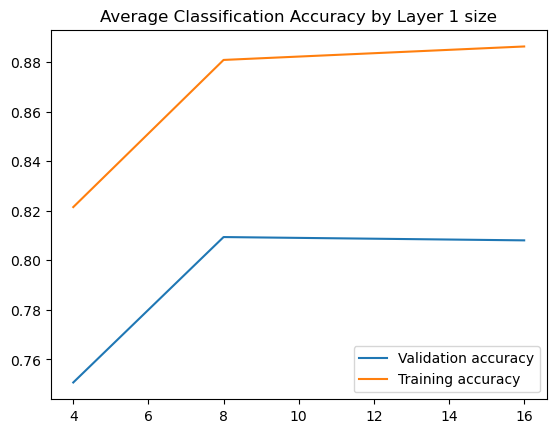

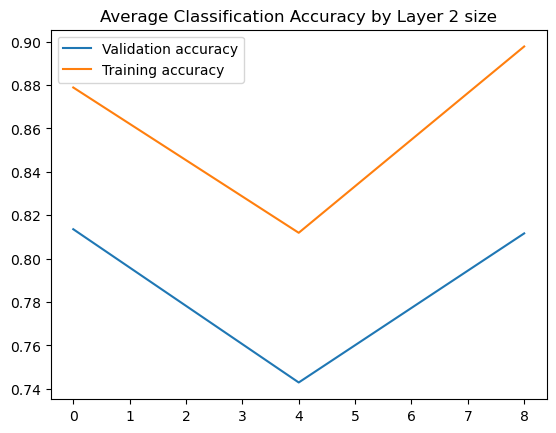

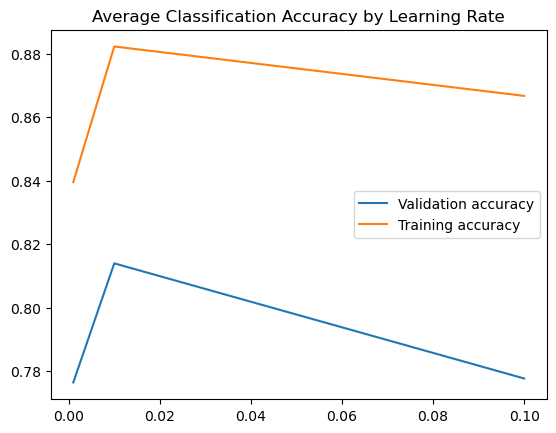

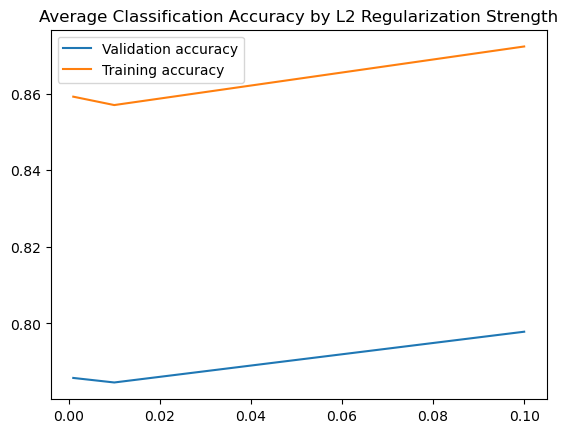

In [27]:
for hyperparameter in ("Layer 1 size", "Layer 2 size", "Learning Rate", "L2 Regularization Strength"):
    perf_by_value = perf_df.groupby(by=hyperparameter).mean()
    plt.plot(perf_by_value["Pct Accuracy Validation"], label="Validation accuracy")
    plt.plot(perf_by_value["Pct Accuracy Train"], label="Training accuracy")
    plt.legend()
    plt.title(f"Average Classification Accuracy by {hyperparameter}")
    plt.show()

The layer 1 size hyperparameter seemed to have of an appreciable impact on the model's performance, with a variation in classification accuracy slightly over 5% on the validation set between the hyperparameter's optimal known value (8), and its worst known value (4).

The layer 2 size hyperparameter has a comparatively greater impact on average model performance. While models with a single hidden layer performed the best (l2_size = 0), those with an l2_size of 4 performed the worst. We see a slight uptick in accuracy as the size of the second layer increases to 8.

In the case of the learning rate hyperparameter, average model classification accuracy on the validation set fluctuated by less than 4% between the best known value for this hyperparameter (0.01) and the worst known value (0.10).

Out of all hyperparameters which we have tested, the L2 regularization strength hyperparameter had the smallest impact on average model performance. Average model classification accuracy on the validation set only fluctuated by around 1% between the best known for this hyperparameter (0.1) and the worst known value (0.01)

## 3.5 Comparison (10pt)

### 3.5.1 Which model acheives the best performance, NB, SVM or Neural Network (based on the final model performance on the test set)? (5pt)

In [33]:
# Naive Bayes
y_pred = multinomial_tfidf.predict(X_tfidf_test)
print("Naive Bayes Classification accuracy: ", (df_test["label"] == y_pred).mean() *100, "%")

Naive Bayes Classification accuracy:  81.2 %


In [35]:
# SVM
# From 3.3.1, we already know that SVM model has a classification accuracy of 84% on test data

In [34]:
# Neural Network

model = MLPClassifier(
    random_state=12345,
    hidden_layer_sizes=(4,8),
    learning_rate_init=0.001,
    early_stopping=True,
    alpha=0.1,
)
model.fit(X_tfidf_train, df_train["label"])

y_pred = model.predict(X_tfidf_test)

print("Neural Network Classification accuracy: ", (df_test["label"] == y_pred).mean() *100, "%")

Neural Network Classification accuracy:  82.8 %


The model which achieves the best final classification accuracy on the test set is the SVM model, with an accuracy of 84%.

### 3.5.2 How did you determine the best model in the previous question? (5pt)

I have evaluated the percent classification accuracy of each model on the test subset, which is composed of data which was left out during both model training and hyperparameter tuning. It should be noted that, because classification accuracy on test data has been evaluated for more than one model, the measure is no longer representative of the model's expected performance on real world data. In other words, we cannot say that we expect the final SVM model to have a classification accuracy of 84% on real-world data, as this measure is probably slightly over-estimated.